<a href="https://colab.research.google.com/github/Sergrey5571/Sergrey5571/blob/main/%D0%9E%D0%B1%D1%83%D1%87_%D0%B8_%D1%82%D0%B5%D1%81%D1%82_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B0_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание Pro:

In [ ]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from sklearn.model_selection import train_test_split
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

Повысить точность модели по обнаружению мин (база sonar)  до 90 % на тестовой выборке. 

Можно использовать различные варианты слоев Dropout и BatchNormalization. Можно менять количество примеров в обучающей и проверочной выборках, но нельзя менять количество примеров в тестовой.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/sonar.csv', header=None)

In [ ]:
df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
dataset = df.values                 # Берем только значения массива(без индексов)
X = dataset[:,0:60].astype(float)   # Присваиваем им тип данных - float(с плавающей точкой) данным с 0 по 60 колонки
Y = dataset[:,60]                   # Присваеваем значению Y данные из столбца с индексом 60
Y[Y=='R']='0'                       # 'R', присваеваем ему значение '0'
Y[Y=='M']='1'                       # 'M', присваеваем ему значение '1'
Y = Y.astype(int)                   # Меняем тип данных столбца на 'int'(целочисленный тип данных)
print(X.shape)                      # размерность X
print(Y.shape)                      # размерность Y
         

(208, 60)
(208,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(21, 60)
(187, 60)
(187,)
(21,)


In [ ]:
def createMode():
  model=Sequential()
  model.add(Dense(60, input_dim=60, activation='relu'))
  #model.add(BatchNormalization())
  model.add(Dense(40, activation='relu'))
  #model.add(BatchNormalization())
  #model.add(Dropout(0.5))
  model.add(Dense(20, activation='relu'))
  #model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=Adadelta(learning_rate=0.1), metrics=['accuracy'])
  return model

In [ ]:
model=createMode()
model.fit(x_train, y_train, batch_size=6, epochs=300, verbose=0)

In [ ]:
x_train_n, x_val, y_train_n, y_val = train_test_split(x_train, y_train, test_size=0.15)

In [ ]:
print(x_train_n.shape)
print(x_val.shape)
print(y_train_n.shape)
print(y_val.shape)

(158, 60)
(29, 60)
(158,)
(29,)


In [ ]:
model=createMode()
model.fit(x_train_n, y_train_n, batch_size=2, epochs=100, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
79/79 [==============================] - 1s 4ms/step - loss: 0.6990 - accuracy: 0.5443 - val_loss: 0.7030 - val_accuracy: 0.4828
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5380 - val_loss: 0.6982 - val_accuracy: 0.4828
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.5316 - val_loss: 0.6940 - val_accuracy: 0.4828
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5380 - val_loss: 0.6927 - val_accuracy: 0.4828
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5506 - val_loss: 0.6918 - val_accuracy: 0.4828
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5696 - val_loss: 0.6891 - val_accuracy: 0.4828
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5570 - val_loss: 0.6878 - val_accuracy: 0.4828
Epoch 8/100
7

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print(scores)

1/1 [==============================] - 0s 18ms/step - loss: 0.3947 - accuracy: 0.8095
[0.39469772577285767, 0.8095238208770752]


In [ ]:
model=createMode()
history=model.fit(x_train, y_train, batch_size=6, epochs=320, validation_split=0.15, verbose=1)

Epoch 1/320
27/27 [==============================] - 1s 7ms/step - loss: 0.7162 - accuracy: 0.4620 - val_loss: 0.7171 - val_accuracy: 0.4828
Epoch 2/320
27/27 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4937 - val_loss: 0.7133 - val_accuracy: 0.5172
Epoch 3/320
27/27 [==============================] - 0s 8ms/step - loss: 0.7039 - accuracy: 0.4810 - val_loss: 0.7098 - val_accuracy: 0.5172
Epoch 4/320
27/27 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5063 - val_loss: 0.7060 - val_accuracy: 0.5172
Epoch 5/320
27/27 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.4873 - val_loss: 0.7039 - val_accuracy: 0.5172
Epoch 6/320
27/27 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5633 - val_loss: 0.7002 - val_accuracy: 0.5172
Epoch 7/320
27/27 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5443 - val_loss: 0.6971 - val_accuracy: 0.5172
Epoch 8/320
2

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


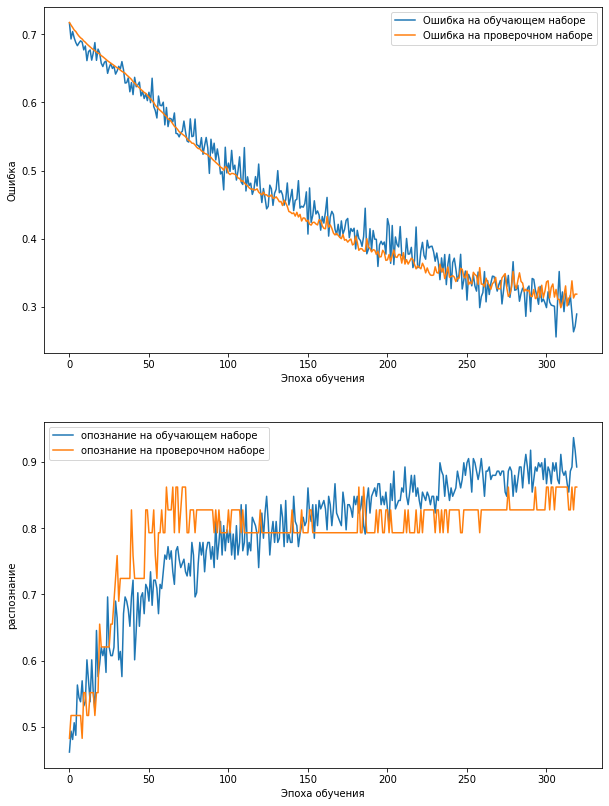

In [ ]:
plt.figure(figsize=(10,14))
plt.subplot(211)
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.subplot(212)
plt.plot(history.history['accuracy'], 
         label='опознание на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='опознание на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('распознание')
plt.legend()
plt.show()

In [ ]:
scores_ = model.evaluate(x_test, y_test, verbose=1)
print(scores_)

1/1 [==============================] - 0s 17ms/step - loss: 0.2607 - accuracy: 0.9524
[0.2606653571128845, 0.9523809552192688]


Вывод: Ни хрена не понял. Вернее понял не до конца. Модель сработала. Но не работала вчера. Тут напрашивается, что звёзды сложились, и проверочная выборка перемешалась должным образом. Значения перебирал часов 5, ориентрировался сразу на графики ошибок. На и на модели validation_data_ тоже были значения макс.0,92. Но при запуске заново они падали, хотя строку с кодом перемешивания массива не трогал. Отсылаю, потому что боюсь, если перезапущу, результат убежит. Но среднем,  по наблюдениям при оптимизаторе Adam показывает результаты хуже , чем Adadelta. Есть ньансы, при Адам, если шаг ставить ещё меньше до 0,0001, результат ухудшается. при Ададельта по умолчанию стоит 1,0. Но если  его уменьшить до 0,1 то уменьшение идёт плавно и уверенней(на этом значении остановился). Dropout  как показали исследования , оптимально получилось 0,5 перед последним слоем. в других случаях оказали негатив. При использовании BatchNormalization собственно происходит выравнивание выходных данных на определённых значениях, Мне показалось как потолок поставили, и на повышение результатов не идёт. Может, наверное, пригодится на входных данных. Вариация с Batch_size  тоже имеет значение, показало, что при пропорции 1 к 30 (5~6 на выборке 150-180) наилучшим образом происходит обработка. Количество эпох, может ввести в заблуждение, но зато чётко показывает на каком этапе начинается переобучение. Иными словами, можно поставить эпох 20 сначала и посмотреть, если сразу пойдёт переобучение то дальше нет смысла увеличивать кол-во эпох. По валидации наилучшим показателем стали 0,15. изменение этого параметра сразу негатив. Добал ещё слой скрытый , всё таки была необходимость. Но также не плохо ведёт скрытый слой с большим колчеством нейронов, от первого. ИТОГ: при наблюдениях более 500, модель в среднем, при тестовой проверке даёт уверенно 80%.  По заданию получил 95,24% , но не считаю что этот результат стабильный. а вот стабильный у меня получился 81%